1)Importing libraries which are required.

In [36]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
import nltk
import numpy as np
from collections import Counter


2)Download nltk stopwords

In [37]:
# Download stopwords (run only once)
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3)Download and load the dataset and show

In [48]:
# Load dataset
df = pd.read_csv("amazon.csv")

# Show the first few rows
df.head(10)
#to show the data in tabular format
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


4)Preprocess Text- basic cleaning the data

In [49]:
# Keep important columns for sentiment analysis
df = df[['reviewerName', 'overall', 'reviewText', 'reviewTime']].copy()

# Drop rows with missing reviewText
df.dropna(subset=['reviewText'], inplace=True)

# Drop duplicate reviews
df.drop_duplicates(subset=['reviewText'], inplace=True)

# Check shape after cleaning
print("Shape after cleaning:", df.shape)


# Preprocessing function
def preprocess(text):
    text = str(text).lower()                         # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)             # Remove punctuation and digits
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing
df['clean_review'] = df['reviewText'].apply(preprocess)

# Preview
df[['reviewText', 'clean_review']].head()



Shape after cleaning: (4912, 4)


,reviewText,clean_review
0,No issues.,issues
1,"Purchased this for my device, it worked as adv...",purchased device worked advertised never much ...
2,it works as expected. I should have sprung for...,works expected sprung higher capacity think ma...
3,This think has worked out great.Had a diff. br...,think worked greathad diff bran gb card went s...
4,"Bought it with Retail Packaging, arrived legit...",bought retail packaging arrived legit orange e...


5)Sentiment Analysis using TextBlob

In [50]:
# Sentiment analysis function
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['sentiment'] = df['clean_review'].apply(get_sentiment)

# Preview
df[['clean_review', 'sentiment']].head()


,clean_review,sentiment
0,issues,Neutral
1,purchased device worked advertised never much ...,Negative
2,works expected sprung higher capacity think ma...,Positive
3,think worked greathad diff bran gb card went s...,Positive
4,bought retail packaging arrived legit orange e...,Positive


6)Words Tokenization and Word Frequency Analysis 

In [56]:
# Tokenize cleaned text
df['tokens'] = df['clean_review'].apply(lambda x: x.split())

# Preview tokens
df[['clean_review', 'tokens']].head()

# Flatten all tokens
all_words = np.concatenate(df['tokens'].values)

# Calculate word frequencies
word_freq = Counter(all_words)

# Top 10 frequent words
print(" Top 10 most frequent words:")
print(word_freq.most_common(10))



 Top 10 most frequent words:
[('card', 4603), ('gb', 1725), ('phone', 1684), ('works', 1558), ('great', 1445), ('memory', 1361), ('sandisk', 1286), ('sd', 1199), ('use', 1115), ('one', 1072)]


7)Finding Top Words by Sentiment

In [52]:
# Function to get top words per sentiment
def top_words_by_sentiment(sentiment_label, top_n=10):
    subset = df[df['sentiment'] == sentiment_label]
    all_tokens = np.concatenate(subset['tokens'].values)
    freq = Counter(all_tokens)
    return freq.most_common(top_n)

# Show top words
print("Top words in Positive reviews:")
print(top_words_by_sentiment("Positive"))

print("Top words in Negative reviews:")
print(top_words_by_sentiment("Negative"))

print("Top words in Neutral reviews:")
print(top_words_by_sentiment("Neutral"))


Top words in Positive reviews:
[('card', 4005), ('gb', 1472), ('great', 1436), ('phone', 1431), ('works', 1371), ('memory', 1138), ('sandisk', 1066), ('sd', 1046), ('use', 953), ('one', 880)]
Top words in Negative reviews:
[('card', 458), ('gb', 179), ('sandisk', 171), ('phone', 168), ('one', 131), ('memory', 129), ('cards', 107), ('sd', 103), ('galaxy', 88), ('use', 88)]
Top words in Neutral reviews:
[('card', 140), ('works', 100), ('memory', 94), ('phone', 85), ('gb', 74), ('use', 74), ('one', 61), ('tablet', 58), ('galaxy', 57), ('bought', 53)]


8)Visualize the Sentiment Distribution Plot

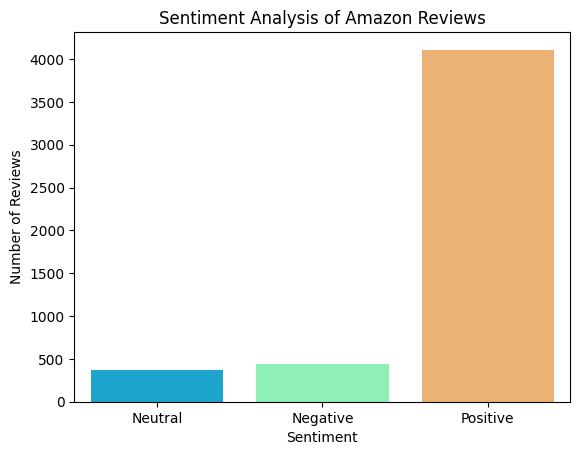

In [55]:
# Plot sentiment counts
sns.countplot(x='sentiment', data=df, hue='sentiment', palette='rainbow', legend=False)
plt.title("Sentiment Analysis of Amazon Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()
# Show final DataFrame columns

# print(df.columns)
